In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse

In [17]:
def accuracy_report(y_true, y_pred, make_plot=True):
    print('MSE: {:.3f}'.format(mse(y_true, y_pred)))
    print('RMSE: {:.3f}'.format(np.sqrt(mse(y_true, y_pred))))
    print('MAE: {:.3f}'.format(mae(y_true, y_pred)))
    if make_plot:
        plt.figure(figsize=(8,6))
        plt.scatter(y_true, y_pred)
        plt.xlabel('Reality')
        plt.ylabel('Prediction')
        plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')

In [18]:
df = pd.read_csv("C:\\Users\\Lenar\\PycharmProjects\\python-parser-cian\\data.csv")
df["Price_per_meters"] = df["Price_per_month"]/(df["Square_meters"].astype(float))
df["Author"] = (df["Author"].astype(str))

df.head()

,Square_meters,Commissions %,Street,Link,District,Floor,Price_per_month,Author,All_floors,How_many_rooms,Price_per_meters
0,62,50,Sibgata Hakima,https://kazan.cian.ru/rent/flat/244424052/,Novo-Savinovskij,12,30000,ID 305100,18,2,483.870968
1,75,50,Dostoevskogo,https://kazan.cian.ru/rent/flat/243318735/,Vahitovskij,5,30000,ID 305100,12,2,400.000000
2,186,50,Sibgata Hakima,https://kazan.cian.ru/rent/flat/237818882/,Novo-Savinovskij,9,100000,ID 305100,16,4,537.634409
3,110,50,Tovarischeskaja,https://kazan.cian.ru/rent/flat/236848944/,Vahitovskij,5,50000,ID 305100,9,3,454.545455
4,220,50,Tolstogo,https://kazan.cian.ru/rent/flat/243010354/,Vahitovskij,9,130000,ID 305100,12,4,590.909091


### Отбросим некоторые признаки

In [19]:
del df['Link']
del df['Commissions %']
del df['Street']
del df['Price_per_month']

df.head()

,Square_meters,District,Floor,Author,All_floors,How_many_rooms,Price_per_meters
0,62,Novo-Savinovskij,12,ID 305100,18,2,483.870968
1,75,Vahitovskij,5,ID 305100,12,2,400.000000
2,186,Novo-Savinovskij,9,ID 305100,16,4,537.634409
3,110,Vahitovskij,5,ID 305100,9,3,454.545455
4,220,Vahitovskij,9,ID 305100,12,4,590.909091


### Рассмотрим, в каких районах больше всего предложений

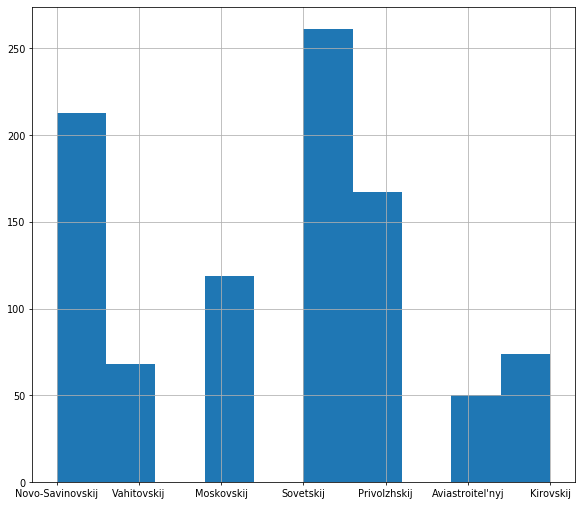

In [29]:
fig=plt.figure(figsize=(10, 9), dpi= 70, facecolor='w', edgecolor='k')
df['District'].hist()

### Распределение цен на квадратный метр

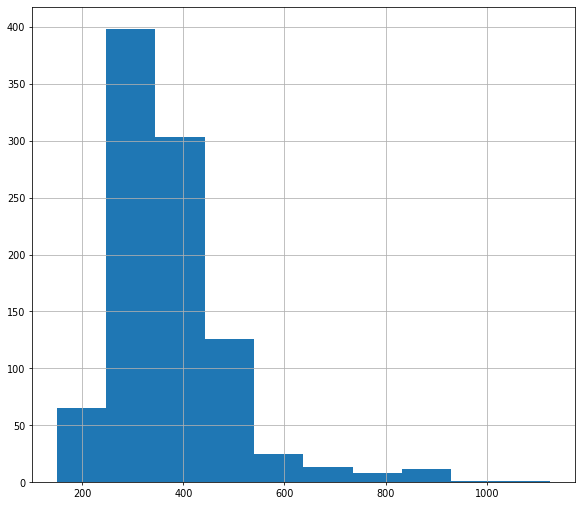

In [30]:
fig=plt.figure(figsize=(10, 9), dpi= 70, facecolor='w', edgecolor='k')
df['Price_per_meters'].hist()

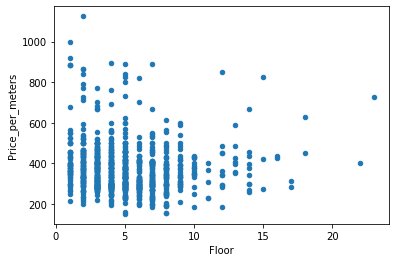

In [39]:
df.plot.scatter(x = 'Floor', y = 'Price_per_meters')

### Исследуем данные в зависимости от района

#### 1. Вахитовский район

In [34]:
data_vahitov = df.loc[df['District'] == 'Vahitovskij'].copy()
data_vahitov.head()

,Square_meters,District,Floor,Author,All_floors,How_many_rooms,Price_per_meters
1,75,Vahitovskij,5,ID 305100,12,2,400.000000
3,110,Vahitovskij,5,ID 305100,9,3,454.545455
4,220,Vahitovskij,9,ID 305100,12,4,590.909091
6,65,Vahitovskij,2,ID 305100,5,2,461.538462
8,85,Vahitovskij,15,ID 305100,20,3,823.529412


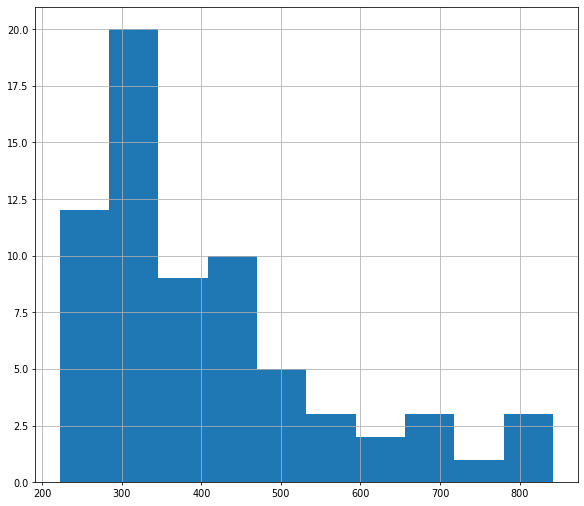

In [36]:
fig=plt.figure(figsize=(10, 9), dpi= 70, facecolor='w', edgecolor='k')
data_vahitov['Price_per_meters'].hist()

### Преобразуем нечисловые признаки в числовые

In [58]:
enc = LabelEncoder()
df.iloc[:,4] = enc.fit_transform(df.iloc[:,4])

df.head()

,How_many_rooms,All_floors,Floor,Square_meters,Author,Price_per_meters
0,4,16,9,186,48,537.634409
1,2,18,12,62,48,483.870968
2,2,12,5,75,48,400.000000
3,3,9,5,110,48,454.545455
4,2,5,2,65,48,461.538462


### Построим гистаграмму распределения объявлений

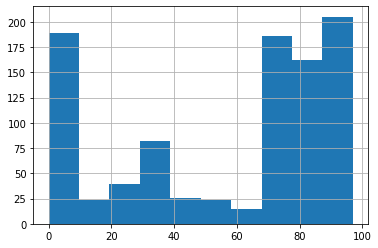

In [59]:
df['Author'].hist()

#### Видно, что довольно много людей имеют по несколько сотен объявлений (от 150 и более)

### Применим линейную модель

MSE: 14043.432
RMSE: 118.505
MAE: 78.800


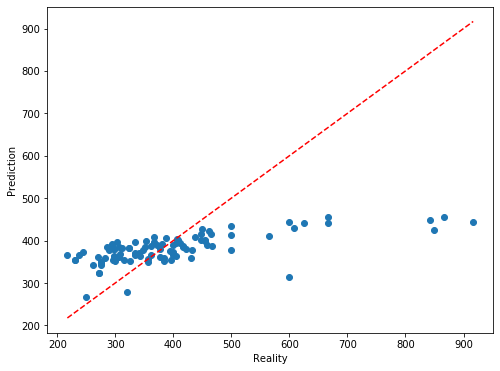

In [60]:
train_data, test_data, train_labels, test_labels = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size = 0.1, random_state=0)

model = LinearRegression()
model.fit(X=train_data, y=train_labels)

accuracy_report(test_labels, model.predict(test_data))


### Также применим линейную модель, но предварительно удалив ещё один признак

In [61]:
df2 = df.copy()
df2.head()

,How_many_rooms,All_floors,Floor,Square_meters,Author,Price_per_meters
0,4,16,9,186,48,537.634409
1,2,18,12,62,48,483.870968
2,2,12,5,75,48,400.000000
3,3,9,5,110,48,454.545455
4,2,5,2,65,48,461.538462


In [62]:
del df2['Author']

df2.head()

,How_many_rooms,All_floors,Floor,Square_meters,Price_per_meters
0,4,16,9,186,537.634409
1,2,18,12,62,483.870968
2,2,12,5,75,400.000000
3,3,9,5,110,454.545455
4,2,5,2,65,461.538462


MSE: 14361.682
RMSE: 119.840
MAE: 80.204


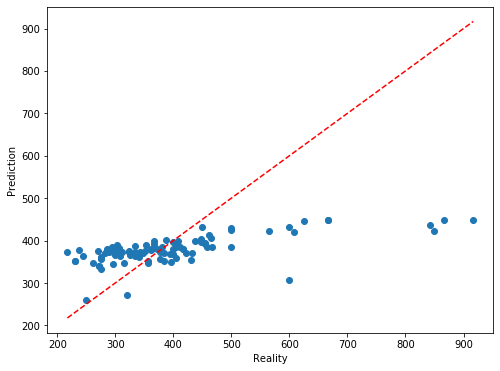

In [63]:
train_data, test_data, train_labels, test_labels = train_test_split(df2.iloc[:, :-1], df2.iloc[:, -1], test_size = 0.1, random_state=0)
model = LinearRegression()
model.fit(X=train_data, y=train_labels)

accuracy_report(test_labels, model.predict(test_data))
